In [60]:

import time
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MaxAbsScaler, maxabs_scale, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support, classification_report,confusion_matrix,mean_squared_error 
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_tree
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.image as mpimg
import time
import datetime

In [4]:
df = pd.read_csv("dataset_preprocessed.csv", parse_dates=['event_date'])
df['event_description'].fillna(value='', inplace=True)
df.columns

Index(['event_date', 'event_title', 'event_description', 'location_description', 'location_accuracy', 'landslide_category', 'landslide_trigger', 'landslide_size', 'landslide_setting', 'fatality_count', 'injury_count', 'country_name', 'admin_division_name', 'admin_division_population', 'gazeteer_closest_point', 'gazeteer_distance', 'longitude', 'latitude', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'windgust', 'windspeed', 'winddir', 'pressure', 'cloudcover', 'visibility', 'moonphase', 'conditions', 'stations', 'elevation', 'continent', 'season', 'treecover2000', 'loss', 'gain', 'soil_texture_0', 'soil_texture_10', 'soil_texture_30', 'soil_texture_60', 'soil_texture_100', 'soil_texture_200', 'population_density_2000', 'population_density_2005', 'population_density_2010', 'population_density_2015', 'population_density_2020'], dtype='object')

In [12]:
df.head(5)

,event_date,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,country_name,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,longitude,latitude,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,windgust,windspeed,winddir,pressure,cloudcover,visibility,moonphase,conditions,stations,elevation,continent,season,treecover2000,loss,gain,soil_texture_0,soil_texture_10,soil_texture_30,soil_texture_60,soil_texture_100,soil_texture_200,population_density_2000,population_density_2005,population_density_2010,population_density_2015,population_density_2020
0,2008-08-01 00:00:00,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,0.0,China,Shaanxi,0,Jingyang,41.02145,107.4500,32.5625,31.2,24.5,27.3,32.6,24.5,28.2,20.3,66.50,0.00,0.00,50.955865,8.3,230.400000,1006.9,63.1,17.2,0.00,Partially cloudy,"['57237099999', '57127099999']",709.0,Asia,summer,0,0.0,0,Lo,Lo,Lo,Lo,ClLo,ClLo,10.897663,10.860593,10.777864,10.649446,10.416670
1,2009-01-02 02:00:00,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,0.0,United States,Oregon,36619,Lake Oswego,0.60342,-122.6630,45.4200,6.0,1.1,3.2,5.2,-4.6,1.7,1.2,87.27,26.99,58.33,50.955865,26.7,213.100000,1010.4,56.2,14.7,0.14,"Rain, Partially cloudy","['72695994281', '72698024229', '72791894298']",39.0,North America,winter,0,0.0,0,Lo,Lo,Lo,Lo,Lo,Lo,1709.162231,1803.502075,1896.032104,1971.151001,2037.960693
2,2009-07-31 00:00:00,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,0.0,Nepal,Mid Western,20908,Dailekh,0.75395,81.7080,28.8378,23.9,23.9,23.9,23.9,23.9,23.9,23.4,97.03,0.00,0.00,50.955865,0.0,176.563614,996.4,60.0,5.0,0.37,Partially cloudy,['44416099999'],1396.0,Asia,summer,0,0.0,0,Lo,Lo,Lo,ClLo,ClLo,ClLo,67.572578,77.243866,80.174164,76.922607,65.961479
3,2010-10-16 12:00:00,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,0.0,Philippines,Central Visayas,798634,Cebu City,2.02204,123.8978,10.3336,31.0,24.0,27.5,40.6,24.0,31.5,25.2,87.48,8.90,8.70,50.955865,14.8,176.800000,1008.0,88.6,9.8,0.33,"Rain, Partially cloudy","['98646099999', '98644099999', 'RPVM']",75.0,Asia,autumn,0,0.0,0,ClLo,ClLo,ClLo,ClLo,ClLo,ClLo,4523.530762,5415.132812,6229.119141,7087.629883,7936.315918
4,2012-02-16 00:00:00,"Paguite, Abuyog, Leyte",Thursday’s landslides were noted in Barangays ...,"Paguite, Abuyog, Leyte",5km,landslide,downpour,medium,unknown,0.0,0.0,Philippines,Eastern Visayas,2404,Balinsacayao,2.28967,124.9668,10.7004,27.1,24.6,25.8,30.8,24.6,26.6,24.2,91.17,42.38,62.50,50.955865,10.2,213.300000,1007.8,94.1,12.2,0.85,"Rain, Overcast","['98648099999', '98550099999']",8.0,Asia,winter,0,0.0,0,ClLo,ClLo,ClLo,ClLo,ClLo,ClLo,251.648697,272.018524,282.545380,290.291809,293.511353


In [3]:
dfs = pd.read_csv("dataset_preprocessed.csv", parse_dates=['event_date'])
dfs['event_description'].fillna(value='', inplace=True)

df_country_Vietnam = dfs.loc[lambda df: dfs['country_name'] == 'Vietnam', :].loc[:, ['event_date',"longitude", "latitude"]].sort_values("event_date")
df_country_Vietnam.head(5)

,event_date,longitude,latitude
5958,2007-07-01,107.2930,21.0233
5260,2007-10-05,105.3500,20.0400
6592,2007-10-05,103.9000,21.3167
4286,2007-10-15,107.9408,15.6045
1701,2007-10-30,107.9660,15.5946


In [5]:
df_country_Vietnam.shape

(105, 3)

In [46]:
df_2007 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2007])]
df_2008 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2008])]
df_2009 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2009])]
df_2010 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2010])]
df_2011 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2011])]
df_2012 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2012])]
df_2013 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2013])]
df_2014 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2014])]
df_2015 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2015])]
df_2016 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2016])]
df_2017 = df_country_Vietnam.loc[df_country_Vietnam['event_date'].dt.year.isin([2017])]
df_year = [df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017]
list_year = ["2007","2008","2009","2010","2011","2012","2013","2014","2015","016","2017"]

In [160]:
#string to timestamp
string = "2017-04-22 18:27:00"
print(time.mktime(datetime.datetime.strptime(string,
                                            '%Y-%m-%d %H:%M:%S').timetuple()))
#timestamp to string
t = 1492860420.0
datetime.datetime.fromtimestamp(t).isoformat(" ")

<class 'float'>


In [117]:
print(df_2017.shape)
df_2017

(8, 3)


,event_date,longitude,latitude
8716,2017-04-22 18:27:00,105.343905,10.505470
233,2017-05-30 13:34:00,104.991371,8.757673
317,2017-06-27 13:20:00,105.454732,9.237363
217,2017-06-28 13:10:00,105.050925,8.774708
215,2017-06-28 13:10:00,105.107108,8.828620
110,2017-07-03 14:33:00,105.424489,23.161002
45,2017-07-03 14:33:00,104.453085,22.690403
12,2017-07-03 14:33:00,105.529997,23.143830


In [68]:
for i in df_year:
    print(i.shape)

(7, 3)
(16, 3)
(6, 3)
(24, 3)
(7, 3)
(3, 3)
(10, 3)
(2, 3)
(15, 3)
(7, 3)
(8, 3)


In [ ]:
df_country_Vietnam

In [148]:
dfs  = pd.read_csv("dataset_preprocessed.csv")
type(dfs["event_date"].iloc[0])

str

In [163]:
type(df_country_Vietnam["event_date"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

##timeseries


In [67]:
dfs = pd.read_csv("dataset_preprocessed.csv")
type(dfs["event_date"].iloc[0]) 

str

In [68]:
df_country_Vietnam = dfs.loc[lambda df: dfs['country_name'] == 'Vietnam', :].loc[:, ['event_date',"longitude", "latitude"]].sort_values("event_date")
df_country_Vietnam["event_date"].head(5)

5958    2007-07-01 00:00:00
5260    2007-10-05 00:00:00
6592    2007-10-05 00:00:00
4286    2007-10-15 00:00:00
1701    2007-10-30 00:00:00
Name: event_date, dtype: object

In [86]:
def to_time(df_temp):
    df_temp["event_date"] = df_temp["event_date"].apply(lambda x: time.mktime(datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').timetuple()))
    return df_temp
def to_string(df_temp):
    df_temp["event_date"] = df_temp["event_date"].apply(lambda x: datetime.datetime.fromtimestamp(x).isoformat(" "))

In [87]:
type(df_country_Vietnam["event_date"].iloc[0]) 

str

In [88]:
df_country_Vietnam.shape

(105, 3)

In [89]:
df_country_Vietnam = to_time(df_country_Vietnam)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_country_Vietnam["event_date"],df_country_Vietnam["longitude"], train_size = 0.8, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# scaler = MaxAbsScaler()
# X_train = scaler.fit_transform(X_train).reshape(-1, 1)
# X_test = scaler.transform(X_test).reshape(-1, 1)
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

long_train_dmatrix = xgb.DMatrix(data = X_train, label = y_train) 
long_test_dmatrix = xgb.DMatrix(data = X_test, label = y_test) 
  
# Parameter dictionary specifying base learner 
param = {"booster":"gblinear", "objective":"reg:linear"} 
  
long_xgb_r = xgb.train(params = param, dtrain = long_train_dmatrix, num_boost_round = 10) 
long_y_pred = long_xgb_r.predict(long_test_dmatrix) 
  
# RMSE Computation 
long_rmse = np.sqrt(mean_squared_error(y_test, long_y_pred)) 
print("RMSE : % f" %(long_rmse)) 
print(long_y_pred)
print(y_test)

(84,) (21,) (84,) (21,)
RMSE :  1.655540
[106.42388  106.41577  106.42938  106.41557  106.40758  106.42075
 106.42656  106.40239  106.41906  106.420784 106.412964 106.40289
 106.42059  106.42668  106.428696 106.42162  106.426315 106.42388
 106.42158  106.42834  106.4208  ]
7129    107.859400
4489    106.693900
6592    103.900000
7843    104.001400
8072    105.734100
6702    108.659100
6585    108.216700
217     105.050925
445     105.313100
531     108.300800
4388    105.795200
8716    105.343905
432     108.743100
5672    106.623000
2640    105.900000
7698    104.459100
6567    105.252300
8177    107.858400
6911    105.741200
6718    108.701000
6599    109.215400
Name: longitude, dtype: float64


In [91]:
# xgb_r = xgb.XGBRegressor() 
  
# # Fitting the model 
# xgb_r.fit(X_train, y_train) 
  
# # Predict the model 
# long_y_pred = xgb_r.predict(X_test) 
  
# # RMSE Computation 
# rmse = np.sqrt(mean_squared_error(y_test, long_y_pred)) 
# print("RMSE : % f" %(rmse)) 

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df_country_Vietnam["event_date"],df_country_Vietnam["latitude"], train_size = 0.8, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

late_train_dmatrix = xgb.DMatrix(data = X_train, label = y_train) 
late_test_dmatrix = xgb.DMatrix(data = X_test, label = y_test) 
  
# Parameter dictionary specifying base learner 
param = {"booster":"gblinear", "objective":"reg:linear"} 
  
late_xgb_r = xgb.train(params = param, dtrain = late_train_dmatrix, num_boost_round = 10) 
late_y_pred = late_xgb_r.predict(late_test_dmatrix) 
  
# RMSE Computation 
late_rmse = np.sqrt(mean_squared_error(y_test, late_y_pred)) 
print("RMSE : % f" %(late_rmse)) 
print(late_y_pred)
print(y_test)

(84,) (21,) (84,) (21,)
RMSE :  4.682312
[17.941399 17.9433   17.940105 17.943348 17.945223 17.942133 17.94077
 17.946442 17.94253  17.942125 17.94396  17.946323 17.942171 17.94074
 17.940268 17.941927 17.940826 17.941399 17.941938 17.940351 17.942122]
7129    14.518900
4489    10.676000
6592    21.316700
7843    22.453900
8072    20.840400
6702    15.330700
6585    15.330000
217      8.774708
445     19.943600
531     15.301200
4388    21.690600
8716    10.505470
432     14.831500
5672    21.300000
2640    20.566700
7698    21.642900
6567     8.831300
8177    15.598000
6911    22.118300
6718    14.992300
6599    13.311100
Name: latitude, dtype: float64


In [112]:
df_country_Vietnam = dfs.loc[lambda df: dfs['country_name'] == 'Vietnam', :].loc[:, ['event_date',"longitude", "latitude"]].sort_values("event_date")
df_country_Vietnam.head(5)

,event_date,longitude,latitude
5958,2007-07-01 00:00:00,107.2930,21.0233
5260,2007-10-05 00:00:00,105.3500,20.0400
6592,2007-10-05 00:00:00,103.9000,21.3167
4286,2007-10-15 00:00:00,107.9408,15.6045
1701,2007-10-30 00:00:00,107.9660,15.5946


In [113]:
df_country_Vietnam['event_date'].iloc[0]

'2007-07-01 00:00:00'

In [114]:
def to_time(df_temp):
    df_temp["event_date"] = df_temp["event_date"].apply(lambda x: time.mktime(datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').timetuple()))
    return df_temp["event_date"]
def to_string(df_temp):
    df_temp["event_date"] = df_temp["event_date"].apply(lambda x: datetime.datetime.fromtimestamp(x).isoformat(" "))

In [110]:
def predict_time(df_temp):
    df_temp1 = df_temp.copy(deep = True)
    print(df_temp1)
    df_temps = pd.DataFrame(columns=["time_stamp","long_pred","late_pred"])
    df_temps["time_stamp"] = to_time(df_temp1)

    long_test_dmatrix = xgb.DMatrix(data = df_temp1["time_stamp"]) 
    df_temps["long_pred"] = long_xgb_r.predict(long_test_dmatrix) 

    return df_temps
df_pred = predict_time(df_country_Vietnam)

KeyError: 'time_stamp'

In [80]:
type(df_country_Vietnam['event_date'].iloc[0])

str

In [70]:
def preprocessing(df_temp):
    dfs = df_temp.copy(deep = True)
    dfs.drop(['admin_division_population','population_density_2000', 'population_density_2005', 'population_density_2010', 'population_density_2015','tempmax','tempmin',"feelslikemax","feelslikemin"], axis="columns", inplace=True)
    ft = dfs.columns.difference(["landslide_size"])
    category_ft = dfs.select_dtypes(exclude=np.number).columns

    enc = OrdinalEncoder()
    enc.fit(dfs[category_ft])
    dfs[category_ft] = enc.transform(dfs[category_ft])

    labelencoder = LabelEncoder()
    dfs["landslide_size"] = labelencoder.fit_transform(dfs["landslide_size"])

    X = dfs[ft]
    y = dfs["landslide_size"]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)
    
    # Scale features
    scaler = MaxAbsScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # df_train[df_train.select_dtypes(include=np.number).columns] = df_train[df_train.select_dtypes(include=np.number).columns].apply(
    #     lambda x: (x - x.min()) / (x.max()-x.min()))
    # df_test[df_train.select_dtypes(include=np.number).columns] = df_test[df_train.select_dtypes(include=np.number).columns].apply(
    #     lambda x: (x - x.min()) / (x.max()-x.min()))
    # Fill empty values by 0
    return X_train, X_test, y_train, y_test

In [84]:

def train(X_train, y_train, X_test, y_test):
    dt = DecisionTreeClassifier(random_state = 0)
    dt.fit(X_train,y_train) 
    dt_score=dt.score(X_test,y_test)
    dt_y_predict=dt.predict(X_test)
    y_true=y_test
    dt_precision,dt_recall,dt_fscore,none= precision_recall_fscore_support(y_true, dt_y_predict, average='weighted') 
    
    

    dt_train=dt.predict(X_train)
    dt_test=dt.predict(X_test)

    rf = RandomForestClassifier(random_state = 0)
    rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
    rf_score=rf.score(X_test,y_test)
    rf_y_predict=rf.predict(X_test)
    y_true=y_test
    rf_precision,rf_recall,rf_fscore,none= precision_recall_fscore_support(y_true, rf_y_predict, average='weighted') 
    
    

    rf_train=rf.predict(X_train)
    rf_test=rf.predict(X_test)

    et = ExtraTreesClassifier(random_state = 0)
    et.fit(X_train,y_train) 
    et_score=et.score(X_test,y_test)
    et_y_predict=et.predict(X_test)
    y_true=y_test
    et_precision,et_recall,et_fscore,none= precision_recall_fscore_support(y_true,et_y_predict, average='weighted') 
    
   
    et_train=et.predict(X_train)
    et_test=et.predict(X_test)

    xg = xgb.XGBClassifier(n_estimators = 10)
    xg.fit(X_train,y_train)
    xg_score=xg.score(X_test,y_test)
    xg_y_predict=xg.predict(X_test)
    y_true=y_test
    xg_precision,xg_recall,xg_fscore,none= precision_recall_fscore_support(y_true, xg_y_predict, average='weighted') 
    
    

    xg_train=xg.predict(X_train)
    xg_test=xg.predict(X_test)

    base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
    print(base_predictions_train.head(5))

    dt_train=dt_train.reshape(-1, 1)
    et_train=et_train.reshape(-1, 1)
    rf_train=rf_train.reshape(-1, 1)
    xg_train=xg_train.reshape(-1, 1)
    dt_test=dt_test.reshape(-1, 1)
    et_test=et_test.reshape(-1, 1)
    rf_test=rf_test.reshape(-1, 1)
    xg_test=xg_test.reshape(-1, 1)

    x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
    x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)  
    
    stk = xgb.XGBClassifier().fit(x_train, y_train)
    stk_y_predict=stk.predict(x_test)
    y_true=y_test
    stk_score=accuracy_score(y_true,stk_y_predict)
    stk_precision,stk_recall,stk_fscore,none= precision_recall_fscore_support(y_true, stk_y_predict, average='weighted') 
    

    # plot_tree(stk)
    # plt.show()

    accuracy  = [dt_score, rf_score, et_score, xg_score, stk_score]
    precision = [dt_precision, rf_precision, et_precision, xg_precision, stk_precision]
    recall = [dt_recall, rf_recall, et_recall, xg_recall, stk_recall]
    f1_score = [dt_fscore, rf_fscore, et_fscore, xg_fscore, stk_fscore]
    for i in [accuracy, precision,recall, f1_score]:
        for j in range(0,5):
            i[j] = i[j]*100
    model = ['Decision Tree', 'Random Forest','Extra Tree','XGBoost',"XGBoost Stacking Model"]
    


    fig = plt.figure(figsize=(30, 10))
    plt.plot(model, accuracy) 
    plt.plot(model, precision)
    plt.plot(model, recall)
    plt.plot(model, f1_score)
    plt.xlabel("Models")  # add X-axis label 
    plt.ylabel("Percent")  # add Y-axis label 
    plt.title("Models score chart")  # add title 
    # plt.xticks(rotation=30, ha='right')
    plt.legend(['Accuracy', 'Precision','Recall','Fscore']) 
    plt.show() 



    fig = plt.figure(figsize=(30, 10))
    plt.plot(y_true, dt_y_predict) 
    plt.plot(y_true,rf_y_predict)
    plt.plot(y_true, et_y_predict)
    plt.plot(y_true,xg_y_predict)
    plt.plot(y_true, stk_y_predict)

    plt.xlabel("Models")  # add X-axis label 
    plt.ylabel("Percent")  # add Y-axis label 
    plt.title("Models score chart")  # add title 
    # plt.xticks(rotation=30, ha='right')
    plt.legend(['Decision Tree', 'Random Forest','Extra Tree','XGBoost',"XGBoost Stacking Model"]) 
    plt.show() 





    print(classification_report(y_true,dt_y_predict))
    cm=confusion_matrix(y_true,dt_y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    # f.subplot(2,2,1)
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    print(classification_report(y_true,rf_y_predict))
    cm=confusion_matrix(y_true,rf_y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    # f.subplot(2,2,2)
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    print(classification_report(y_true,et_y_predict))
    cm=confusion_matrix(y_true,et_y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    # plt.subplot(2,2,3)
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    print(classification_report(y_true,xg_y_predict))
    cm=confusion_matrix(y_true,xg_y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    # plt.subplot(2,2,4)
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    cm=confusion_matrix(y_true,stk_y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    # plt.subplot(2,2,5)
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()
    print(classification_report(y_true,stk_y_predict))






    df_score = pd.DataFrame({'Model': [], 'Accuracy': [], 'Precision': [],'Recall': [],'fscore': []})
    df_score["Model"] = pd.Series(model)
    df_score["Accuracy"] = pd.Series(accuracy)
    df_score["Precision"] = pd.Series(precision)
    df_score["Recall"] = pd.Series(recall)
    df_score["fscore"] = pd.Series(f1_score)
    print(df_score)
    # fig = plt.figure(figsize=(30,20))
    # for i in range(len(numeric_ft)):
    #     ax = plt.subplot(4, 9, i+1)
    #     sns.distplot(df[numeric_ft[i]], kde=True, rug=True, ax=ax)
    
    return dt.feature_importances_, rf.feature_importances_, et.feature_importances_, xg.feature_importances_   

In [85]:
def ft_selection(df_temp, dt_feature, rf_feature, et_feature, xgb_feature):
    
    dfs = df_temp.copy(deep = True)

    ft = dfs.columns.difference(["landslide_size"])
    # calculate the average importance value of each feature
    avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

    print ("Features sorted by their score:")
    print (sorted(zip(map(lambda x: round(x, 4), avg_feature), ft), reverse=True))

    f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), ft), reverse=True)
    print(len(f_list))

    # Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
    Sum = 0
    fs = []
    for i in range(0, len(f_list)):
        Sum = Sum + f_list[i][0]
        fs.append(f_list[i][1])
        if Sum>=0.9:
            break   
    
     
  
    fig = plt.figure(figsize=(30, 10))
    plt.plot(ft, dt_feature, linestyle = 'dashed') 
    plt.plot(ft, rf_feature, linestyle = 'dashed')
    plt.plot(ft, et_feature, linestyle = 'dashed')
    plt.plot(ft, xgb_feature, linestyle = 'dashed')
    plt.plot(ft, avg_feature, linewidth = '10')
    plt.xlabel("Features")  # add X-axis label 
    plt.ylabel("Importance score")  # add Y-axis label 
    plt.title("Immportnace score chart")  # add title 
    plt.xticks(rotation=30, ha='right')
    plt.legend(['Decision Tree Importance Score', 'Random Forest Importance Score','Extra Tree Importance Score','XGBoost Importance Score',"XGBoost Stacking Model"]) 
    plt.show() 
    
    return fs
    # category_ft = dfs.select_dtypes(exclude=np.number).columns
    # enc = OrdinalEncoder()
    # enc.fit(dfs[category_ft])
    # dfs[category_ft] = enc.transform(dfs[category_ft])

    # labelencoder = LabelEncoder()
    # dfs["landslide_size"] = labelencoder.fit_transform(dfs["landslide_size"])
    
    

    # scaler = MaxAbsScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # print(y_train.value_counts())
    # print(y_test.value_counts())
    # print (fs, len(fs))
    # print(y_train)
    
    # return X_train, y_train, X_test, y_test


   DecisionTree  RandomForest  ExtraTrees  XgBoost
0             2             2           2        2
1             1             1           1        2
2             2             2           2        2
3             4             4           4        4
4             2             2           2        2


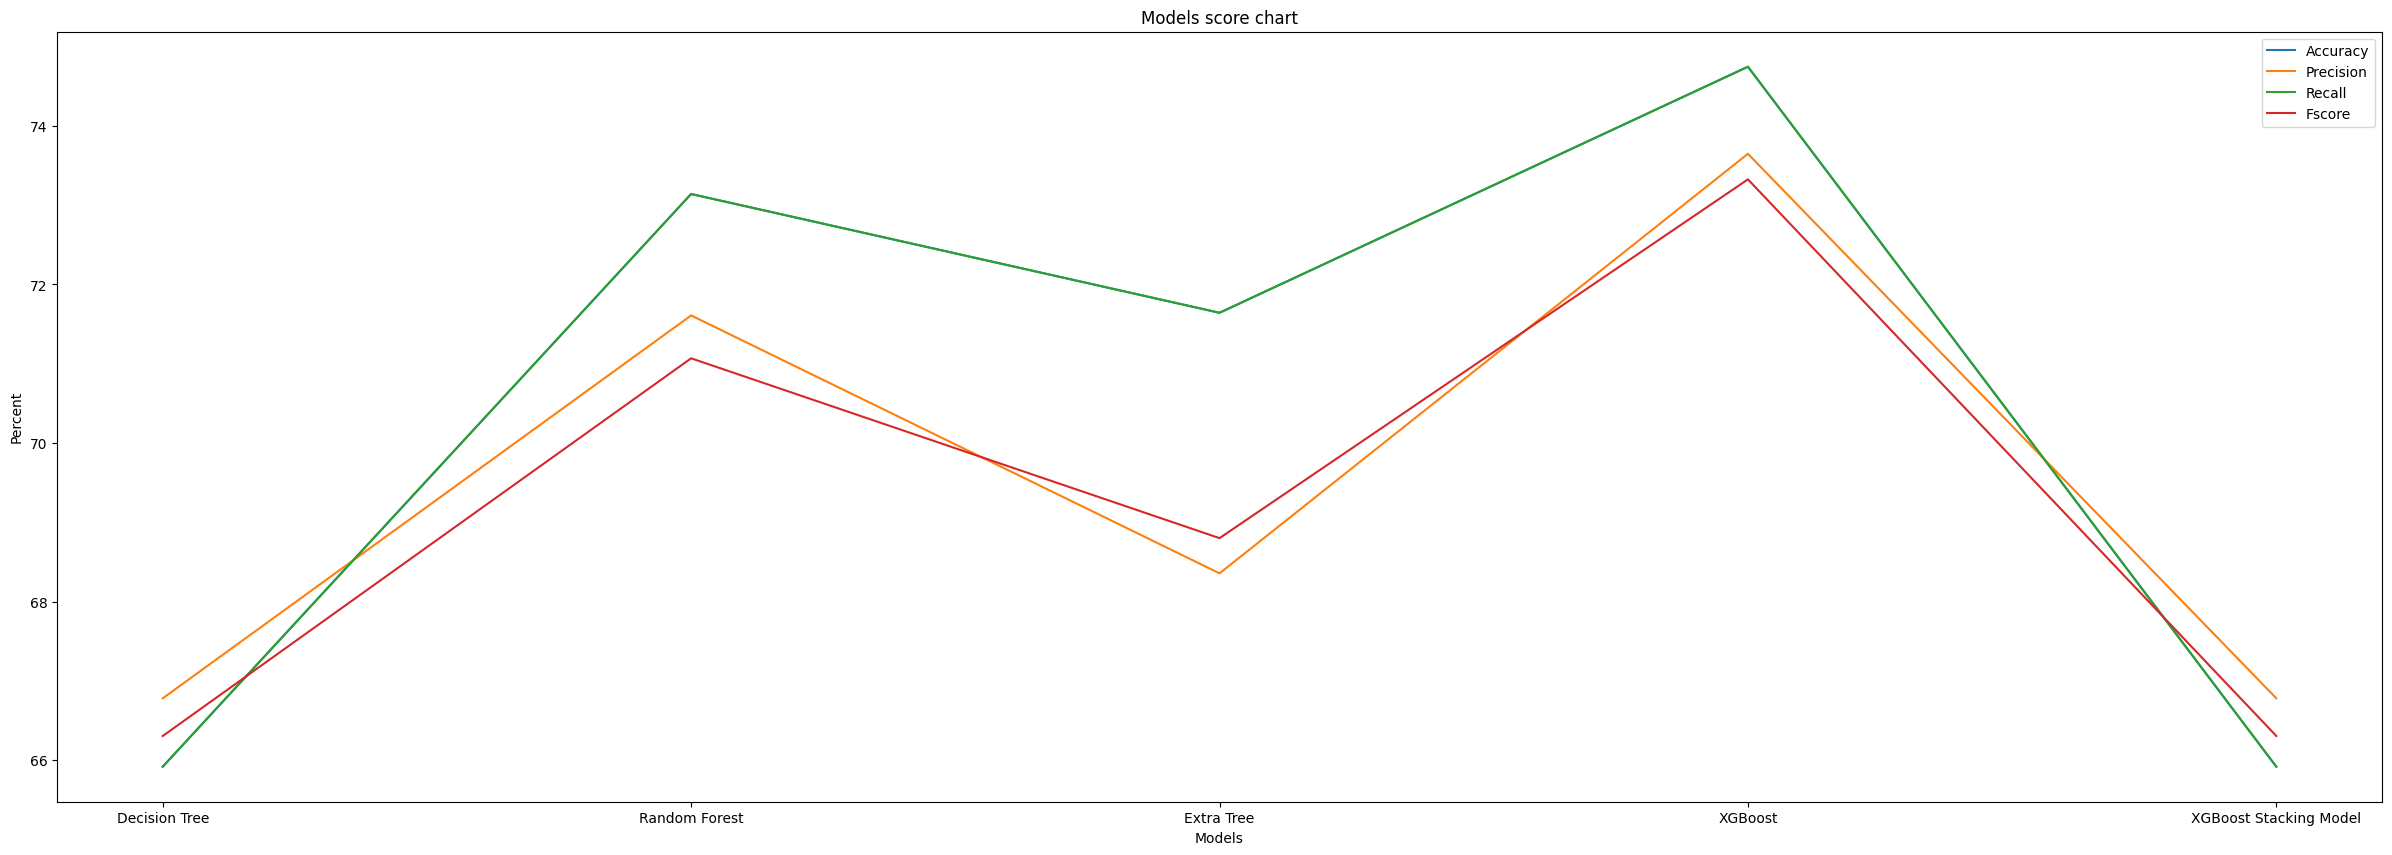

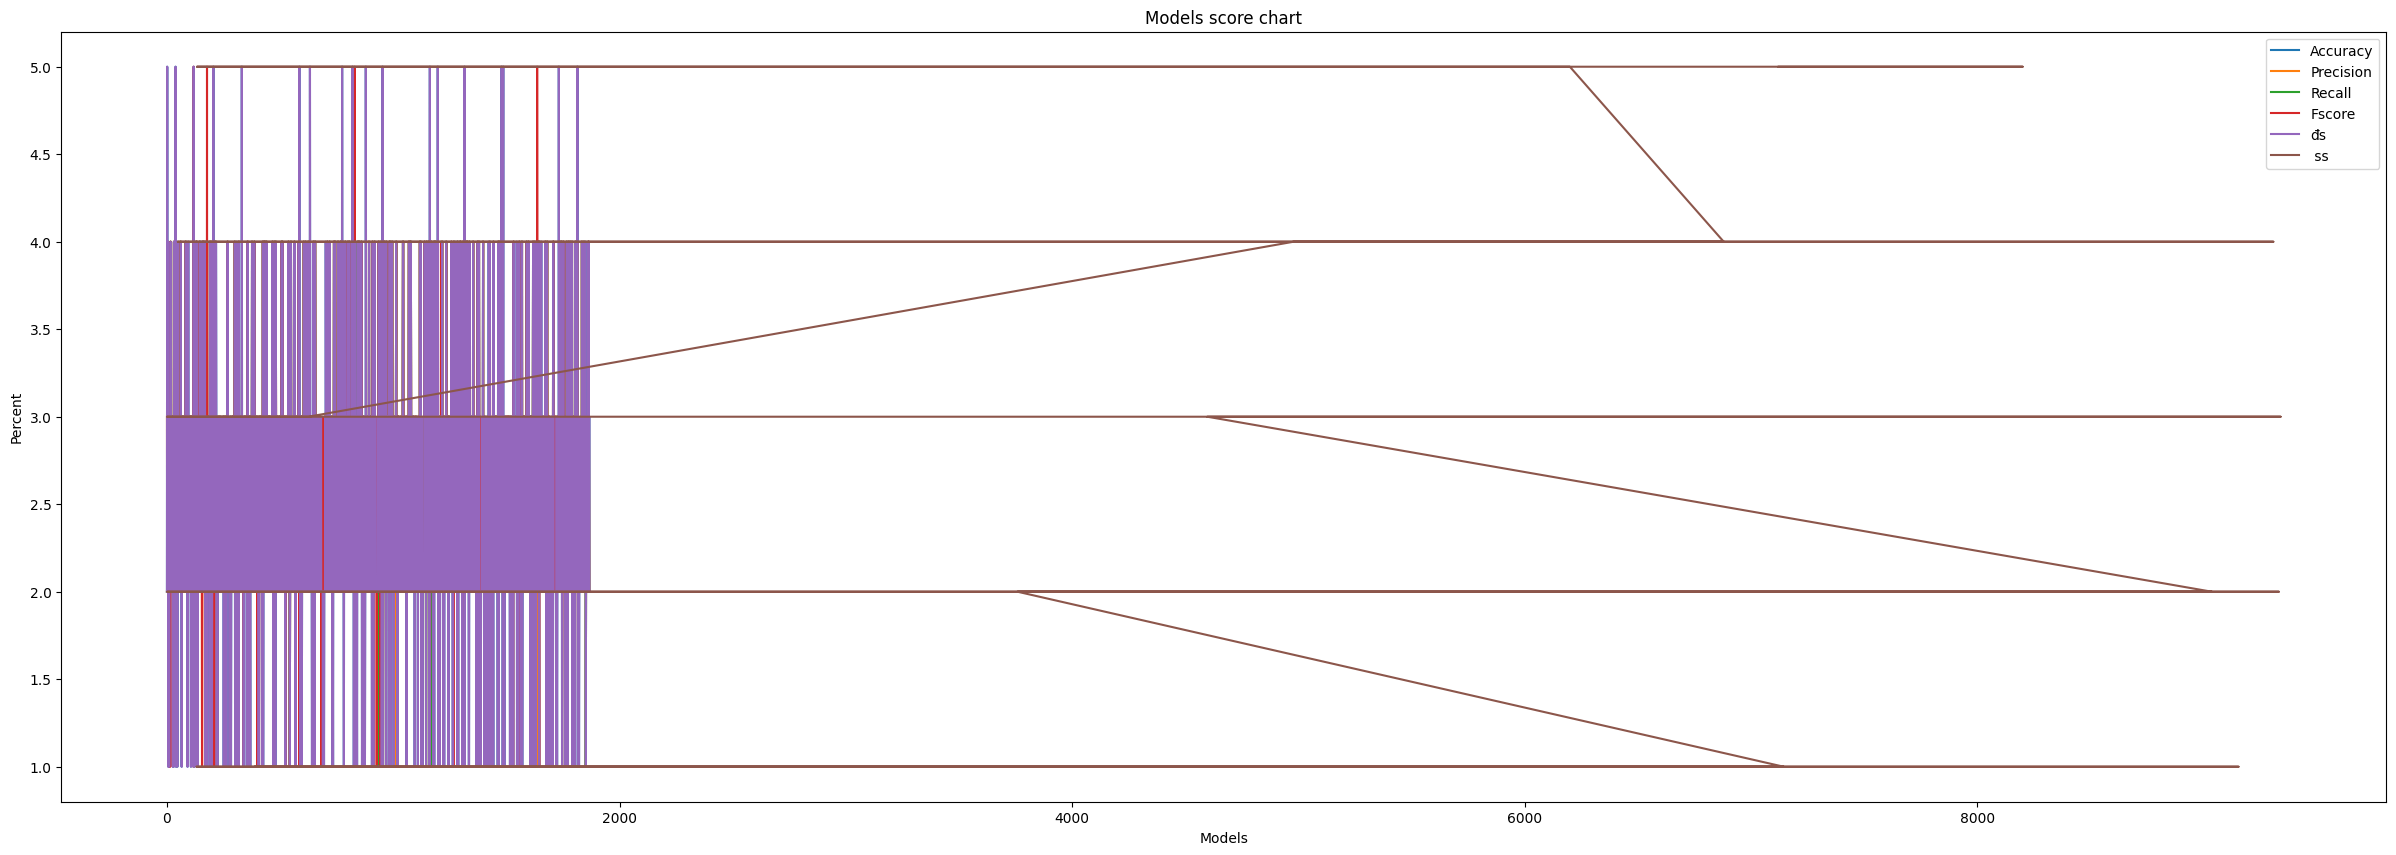

              precision    recall  f1-score   support

           1       0.26      0.31      0.28       118
           2       0.74      0.71      0.73      1074
           3       0.56      0.58      0.57       504
           4       0.88      0.90      0.89       157
           5       0.06      0.06      0.06        16

    accuracy                           0.66      1869
   macro avg       0.50      0.51      0.50      1869
weighted avg       0.67      0.66      0.66      1869



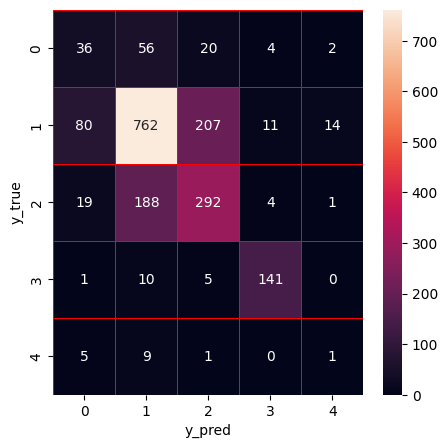

              precision    recall  f1-score   support

           1       0.57      0.14      0.22       118
           2       0.73      0.87      0.79      1074
           3       0.65      0.55      0.60       504
           4       0.99      0.90      0.94       157
           5       0.00      0.00      0.00        16

    accuracy                           0.73      1869
   macro avg       0.59      0.49      0.51      1869
weighted avg       0.72      0.73      0.71      1869



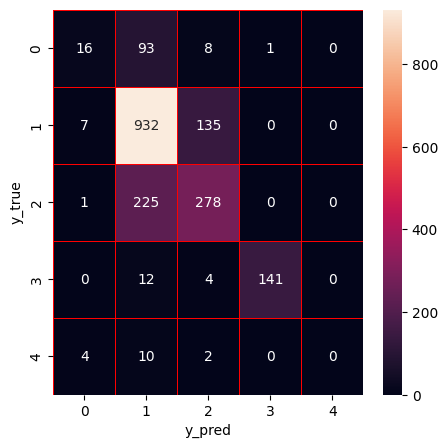

              precision    recall  f1-score   support

           1       0.29      0.02      0.03       118
           2       0.72      0.86      0.78      1074
           3       0.62      0.54      0.58       504
           4       1.00      0.90      0.95       157
           5       0.00      0.00      0.00        16

    accuracy                           0.72      1869
   macro avg       0.53      0.46      0.47      1869
weighted avg       0.68      0.72      0.69      1869



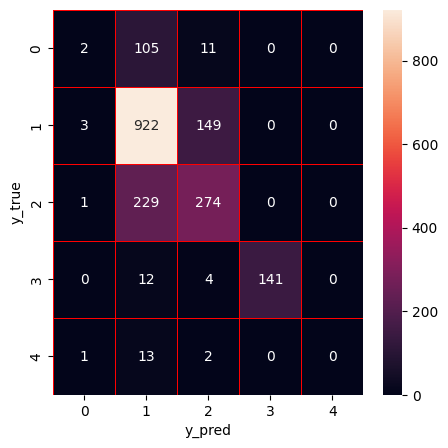

              precision    recall  f1-score   support

           1       0.60      0.18      0.27       118
           2       0.76      0.85      0.80      1074
           3       0.66      0.64      0.65       504
           4       0.99      0.90      0.95       157
           5       0.00      0.00      0.00        16

    accuracy                           0.75      1869
   macro avg       0.60      0.51      0.53      1869
weighted avg       0.74      0.75      0.73      1869



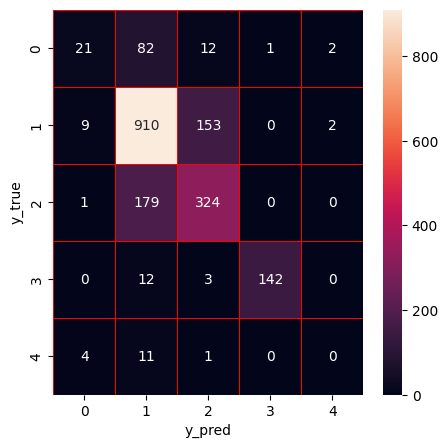

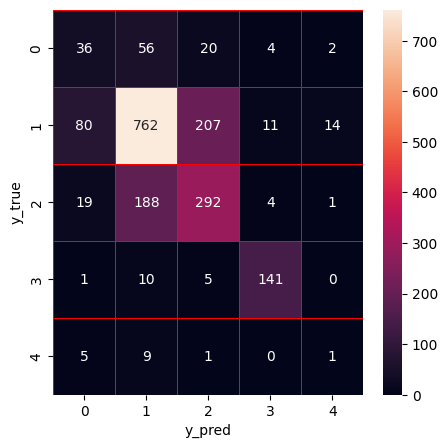

              precision    recall  f1-score   support

           1       0.26      0.31      0.28       118
           2       0.74      0.71      0.73      1074
           3       0.56      0.58      0.57       504
           4       0.88      0.90      0.89       157
           5       0.06      0.06      0.06        16

    accuracy                           0.66      1869
   macro avg       0.50      0.51      0.50      1869
weighted avg       0.67      0.66      0.66      1869

                    Model   Accuracy  Precision     Recall     fscore
0           Decision Tree  65.917603  66.780102  65.917603  66.304931
1           Random Forest  73.140717  71.609343  73.140717  71.068444
2              Extra Tree  71.642590  68.356369  71.642590  68.800466
3                 XGBoost  74.745853  73.647620  74.745853  73.325062
4  XGBoost Stacking Model  65.917603  66.780102  65.917603  66.304931


In [86]:
X_train, X_test, y_train, y_test =  preprocessing(df)
dt_feature, rf_feature, et_feature, xgb_feature = train(X_train, y_train, X_test, y_test)

Features sorted by their score:
[(0.1354, 'event_description'), (0.0773, 'country_name'), (0.0691, 'event_date'), (0.0406, 'landslide_trigger'), (0.0401, 'longitude'), (0.0324, 'fatality_count'), (0.0321, 'latitude'), (0.0282, 'gazeteer_distance'), (0.0272, 'landslide_setting'), (0.0258, 'location_accuracy'), (0.0233, 'population_density_2020'), (0.0217, 'elevation'), (0.0201, 'location_description'), (0.0201, 'event_title'), (0.0201, 'dew'), (0.0196, 'visibility'), (0.0196, 'admin_division_name'), (0.0195, 'winddir'), (0.0194, 'windspeed'), (0.019, 'humidity'), (0.0187, 'stations'), (0.0184, 'temp'), (0.0182, 'pressure'), (0.0181, 'moonphase'), (0.0176, 'feelslike'), (0.0169, 'cloudcover'), (0.0166, 'gazeteer_closest_point'), (0.0158, 'continent'), (0.0155, 'precip'), (0.0147, 'landslide_category'), (0.0145, 'treecover2000'), (0.0141, 'precipcover'), (0.0118, 'season'), (0.0117, 'windgust'), (0.0116, 'soil_texture_10'), (0.0089, 'soil_texture_0'), (0.0081, 'conditions'), (0.0077, 'soi

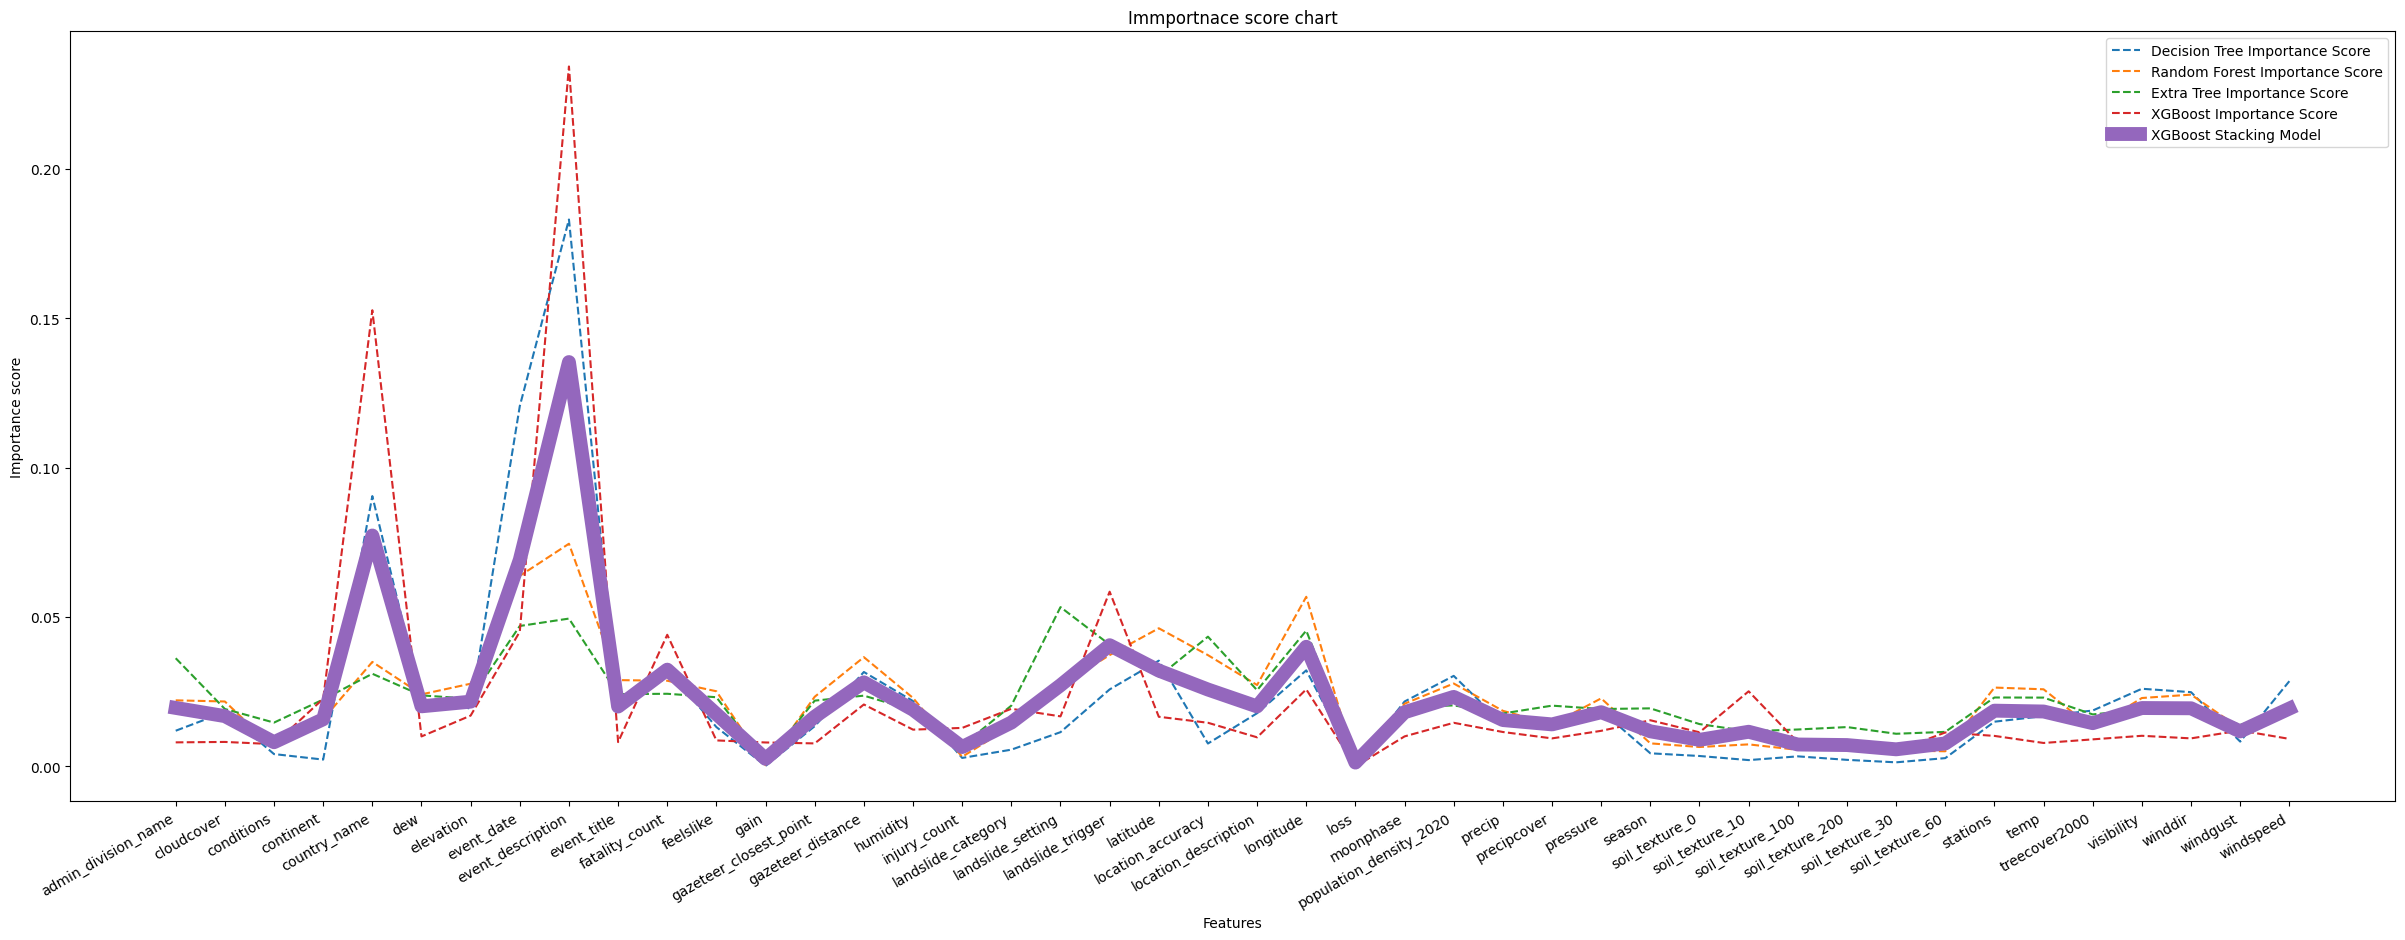

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.23      0.27      0.25       118
           2       0.73      0.72      0.73      1074
           3       0.56      0.56      0.56       504
           4       0.92      0.90      0.91       157
           5       0.12      0.12      0.12        16

    accuracy                           0.66      1869
   macro avg       0.43      0.43      0.43      1869
weighted avg       0.67      0.66      0.66      1869

              precision    recall  f1-score   support

           1       0.52      0.14      0.21       118
           2       0.74      0.86      0.80      1074
           3       0.65      0.58      0.61       504
           4       0.99      0.90      0.94       157
           5       0.00      0.00      0.00        16

    accuracy                           0.74      1869
   macro avg       0.58      0.50      0.51      1869
weighted avg       0.72

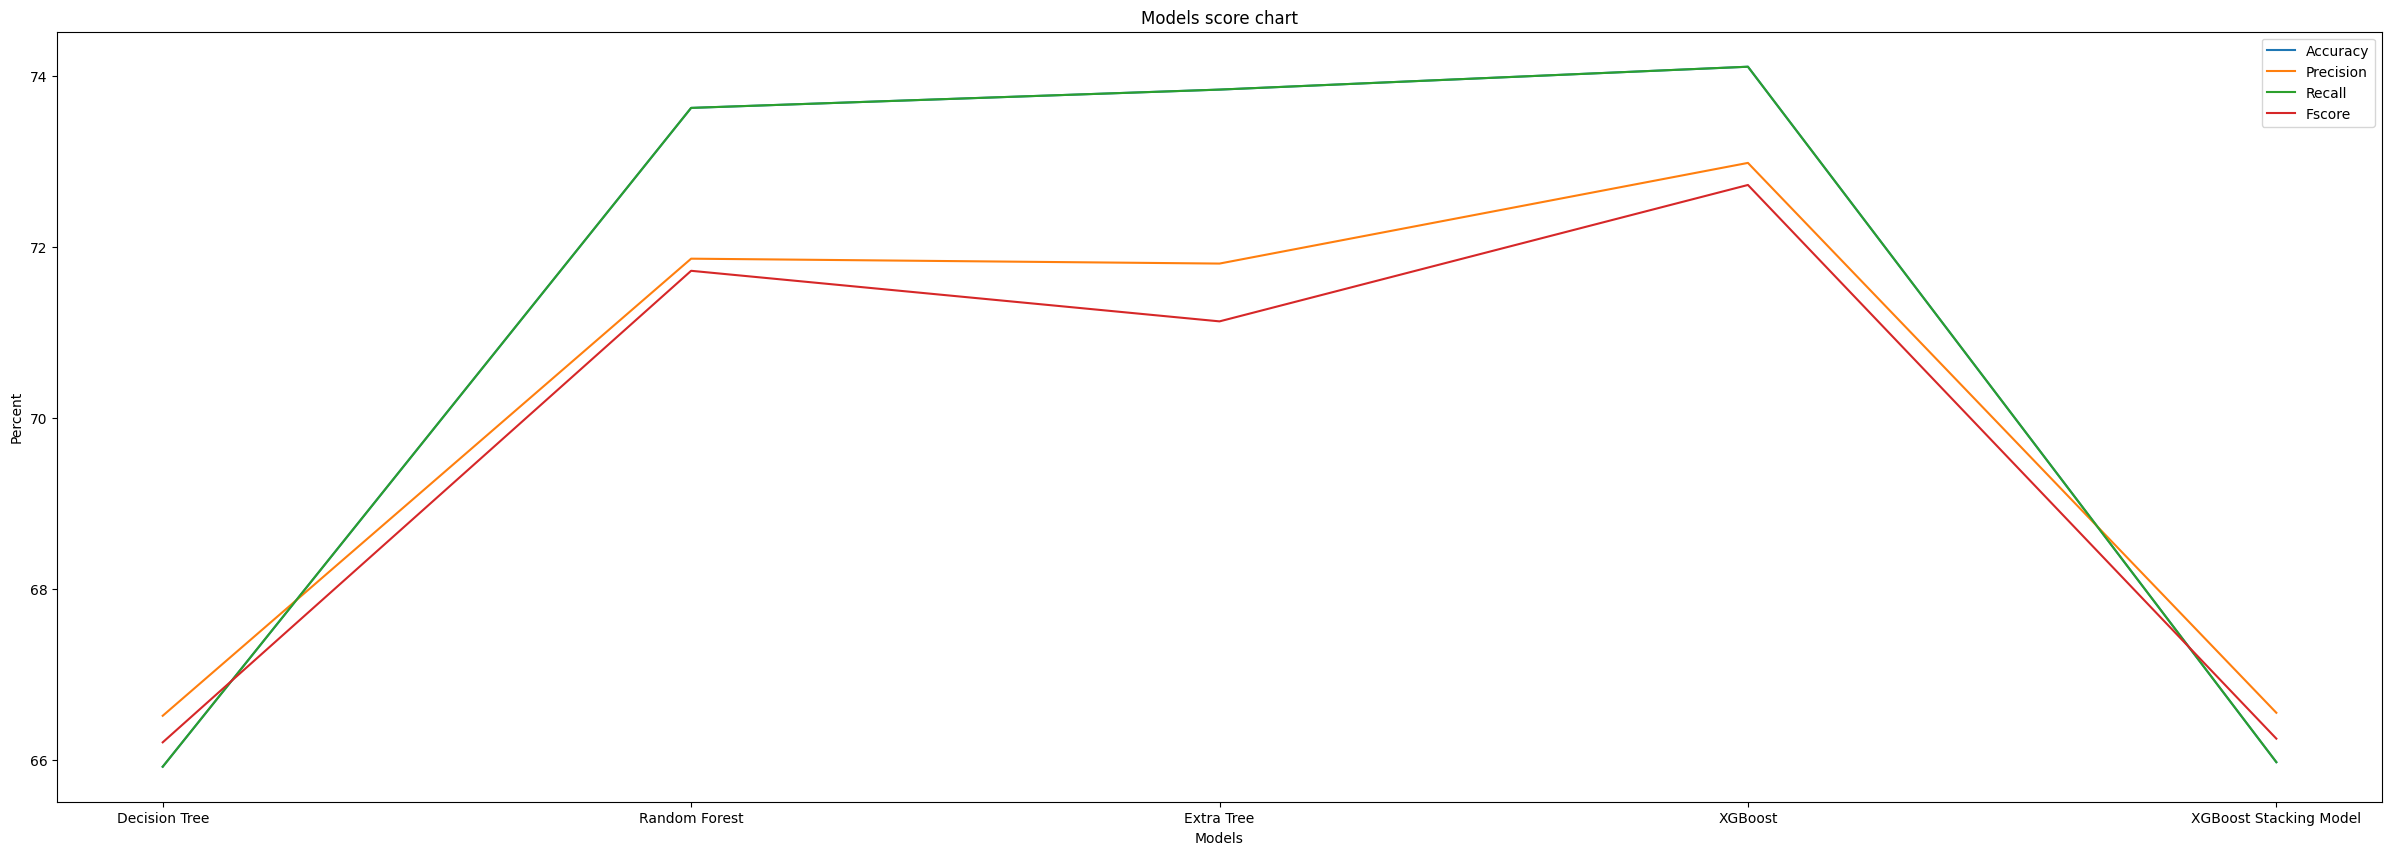

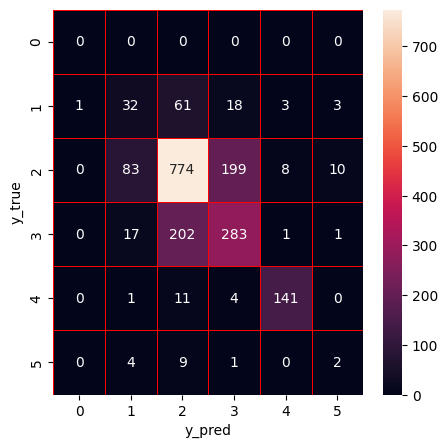

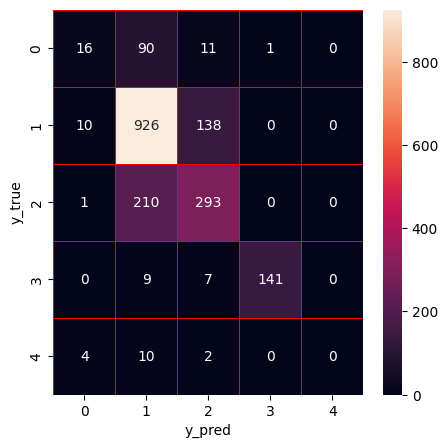

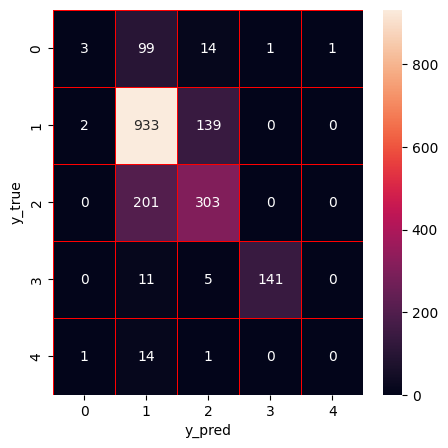

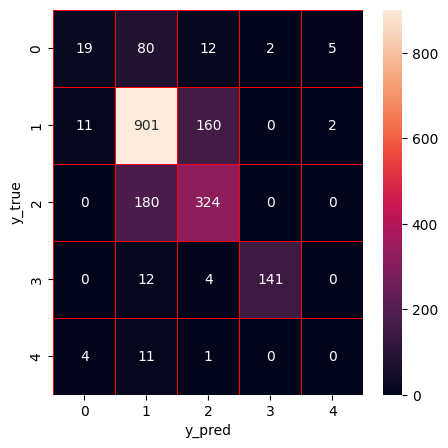

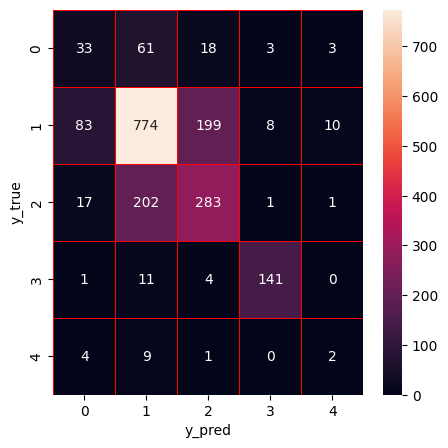

                    Model   Accuracy  Precision     Recall     fscore
0           Decision Tree  65.917603  66.513449  65.917603  66.202736
1           Random Forest  73.622258  71.858985  73.622258  71.717206
2              Extra Tree  73.836276  71.801797  73.836276  71.125810
3                 XGBoost  74.103799  72.979011  74.103799  72.720938
4  XGBoost Stacking Model  65.971108  66.548513  65.971108  66.245871


(array([0.18219942, 0.09154164, 0.12190932, 0.02711446, 0.02786699,
        0.03400057, 0.0388383 , 0.02857864, 0.01484702, 0.00964643,
        0.03280904, 0.02907524, 0.01717562, 0.01983141, 0.02496222,
        0.0215633 , 0.01010164, 0.0272653 , 0.02843226, 0.02180705,
        0.01925446, 0.01602984, 0.0209547 , 0.02345744, 0.0136935 ,
        0.02375233, 0.01369139, 0.00273733, 0.01836563, 0.00784145,
        0.0197727 , 0.01088336]),
 array([0.08983357, 0.03941023, 0.06563749, 0.0386822 , 0.05744303,
        0.03068308, 0.04966054, 0.03797299, 0.02824246, 0.03192014,
        0.03027694, 0.03091008, 0.02786304, 0.02860073, 0.0296951 ,
        0.02475715, 0.02457282, 0.02566549, 0.02316156, 0.02525671,
        0.02727203, 0.02538264, 0.02408193, 0.023298  , 0.02798289,
        0.02404841, 0.0257122 , 0.01837921, 0.0201966 , 0.01258379,
        0.01382996, 0.01698701]),
 array([0.05689436, 0.03754056, 0.05232107, 0.04888522, 0.05269932,
        0.02838759, 0.03574894, 0.02680316, 0.05

In [74]:
fs = ft_selection(df, dt_feature, rf_feature, et_feature, xgb_feature)

ft = df.columns.difference(["landslide_size"])
category_ft = df.select_dtypes(exclude=np.number).columns

enc = OrdinalEncoder()
enc.fit(df[category_ft])
df[category_ft] = enc.transform(df[category_ft])

labelencoder = LabelEncoder()
df["landslide_size"] = labelencoder.fit_transform(df["landslide_size"])

X_fs = df[fs].values     
y = df["landslide_size"]
    
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# X_train, X_test, y_train, y_test = ft_selection(df, dt_feature, rf_feature, et_feature, xgb_feature)

train(X_train, y_train, X_test, y_test)